<a href="https://colab.research.google.com/github/Yang-HA-03/AI-lab/blob/main/computer_vision/Computer%20Vision-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
!unzip -q hymenoptera_data.zip -d data/


unzip:  cannot find or open hymenoptera_data.zip, hymenoptera_data.zip.zip or hymenoptera_data.zip.ZIP.


In [ ]:
!mv /hymenoptera_data.zip /content/



In [ ]:
!unzip -q /content/hymenoptera_data.zip -d data/



In [ ]:
import os
print(os.listdir('data'))
print(os.listdir('data/hymenoptera_data'))



['hymenoptera_data']
['train', 'val']


In [3]:
!pip install torchvision


In [9]:
import os
print(os.getcwd())


/content


In [10]:
!ls


data  sample_computer_vision.zip  sample_data


In [11]:
!mkdir -p data
!unzip -q sample_computer_vision.zip -d data/


In [12]:
import os
print(os.listdir('data'))
print(os.listdir('data/sample_computer_vision'))


['sample_computer_vision']
['train', 'val']


In [13]:
data_dir = 'data/sample_computer_vision'


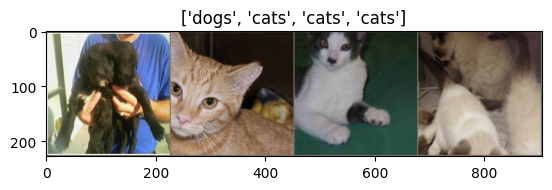

In [14]:
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

# 데이터 변환 (이미 했지만 재확인용)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# 데이터셋 & 로더
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# 시각화 함수
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# 실제 이미지 출력
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")


✅ Using device: cuda


In [11]:
import os
print(os.getcwd())
!ls


/content
sample_data


In [12]:
!ls sample_computer_vision


ls: cannot access 'sample_computer_vision': No such file or directory


In [13]:
!ls data


ls: cannot access 'data': No such file or directory


In [14]:
!ls


sample_data


In [15]:
!unzip -q sample_computer_vision.zip -d data/


unzip:  cannot find or open sample_computer_vision.zip, sample_computer_vision.zip.zip or sample_computer_vision.zip.ZIP.


In [16]:
import os
print(os.getcwd())
!ls


/content
sample_data


In [17]:
!ls


sample_data


In [18]:
!mv /sample_computer_vision.zip /content/


In [19]:
!ls /content


sample_computer_vision.zip  sample_data


In [20]:
!mkdir -p /content/data
!unzip -q /content/sample_computer_vision.zip -d /content/data/


In [21]:
!ls /content/data
!ls /content/data/sample_computer_vision


sample_computer_vision
train  val


In [22]:
data_dir = '/content/data/sample_computer_vision'


In [23]:
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

# 데이터 전처리 설정
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# 데이터셋 경로 (압축 푼 폴더)
data_dir = '/content/data/sample_computer_vision'

# 데이터셋 불러오기
image_datasets = {
    x: datasets.ImageFolder(f'{data_dir}/{x}', data_transforms[x])
    for x in ['train', 'val']
}

# 데이터로더 생성
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=2)
    for x in ['train', 'val']
}

# 데이터셋 크기 및 클래스명 확인
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print("✅ 데이터셋 크기:", dataset_sizes)
print("✅ 클래스 이름:", class_names)


✅ 데이터셋 크기: {'train': 1002, 'val': 200}
✅ 클래스 이름: ['cats', 'dogs']


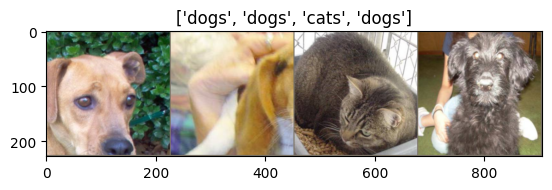

In [24]:
import torchvision

# 이미지 출력용 함수
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 잠시 멈춰서 그림 보이게 함

# 일부 이미지 가져오기
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

# 시각화
imshow(out, title=[class_names[x] for x in classes])


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# 사전 학습된 ResNet18 불러오기
model_ft = models.resnet18(pretrained=True)

# 마지막 fc (fully connected layer) 교체
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))  # class_names는 앞 단계에서 이미 정의됨

model_ft = model_ft.to(device)

# 손실함수, 옵티마이저, 스케줄러 설정
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


✅ Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [26]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"\n📘 Epoch {epoch+1}/{num_epochs}")
        print("-" * 30)

        # 각 epoch마다 train / val 수행
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # 미니배치 학습
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")

            # 최적 모델 저장
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f"\n✅ Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"🏆 Best val Acc: {best_acc:.4f}")

    # 최적 모델 가중치 로드
    model.load_state_dict(best_model_wts)
    return model


In [27]:
model_ft = train_model(
    model_ft,
    criterion,
    optimizer_ft,
    exp_lr_scheduler,
    num_epochs=10
)



📘 Epoch 1/10
------------------------------
train Loss: 0.5751  Acc: 0.7665
val Loss: 0.3895  Acc: 0.8500

📘 Epoch 2/10
------------------------------
train Loss: 0.5763  Acc: 0.7924
val Loss: 0.2033  Acc: 0.9350

📘 Epoch 3/10
------------------------------
train Loss: 0.4886  Acc: 0.8004
val Loss: 0.1506  Acc: 0.9550

📘 Epoch 4/10
------------------------------
train Loss: 0.4664  Acc: 0.8214
val Loss: 0.2825  Acc: 0.8750

📘 Epoch 5/10
------------------------------
train Loss: 0.5038  Acc: 0.8104
val Loss: 0.2851  Acc: 0.9000

📘 Epoch 6/10
------------------------------
train Loss: 0.4678  Acc: 0.8214
val Loss: 0.2317  Acc: 0.9100

📘 Epoch 7/10
------------------------------
train Loss: 0.4742  Acc: 0.8074
val Loss: 0.1797  Acc: 0.9500

📘 Epoch 8/10
------------------------------
train Loss: 0.2632  Acc: 0.8882
val Loss: 0.1519  Acc: 0.9650

📘 Epoch 9/10
------------------------------
train Loss: 0.2980  Acc: 0.8693
val Loss: 0.1646  Acc: 0.9600

📘 Epoch 10/10
----------------------

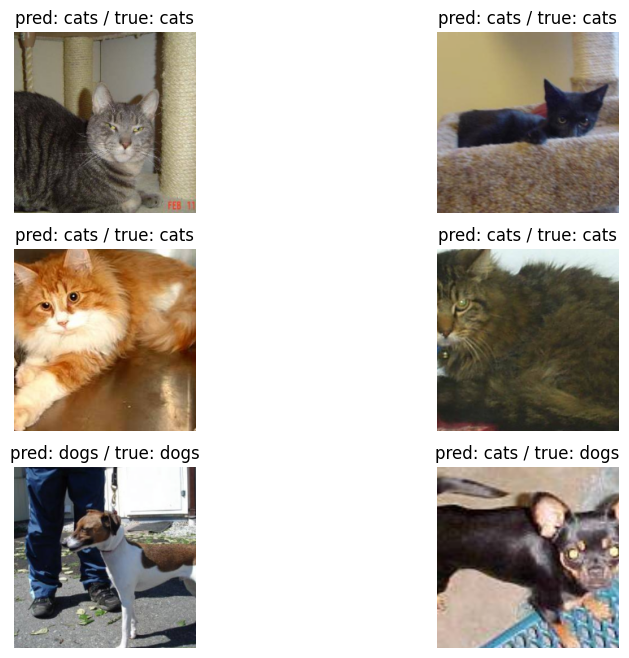

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(10, 8))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis("off")
                ax.set_title(f"pred: {class_names[preds[j]]} / true: {class_names[labels[j]]}")
                inp = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                inp = std * inp + mean
                inp = np.clip(inp, 0, 1)
                plt.imshow(inp)

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(model_ft, num_images=6)
